#Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Importing Dataset

In [2]:
dataset = pd.read_csv('weatherAUS.csv')

In [3]:
dataset.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
#Describe Method says the statistics of our data like Maxvalue,Mean,Count..etc for every column
dataset.describe() 

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [5]:
#count all the null values in the data
dataset.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [6]:
#it is clear that evaporation and sunshine have more missing values so better remove them 

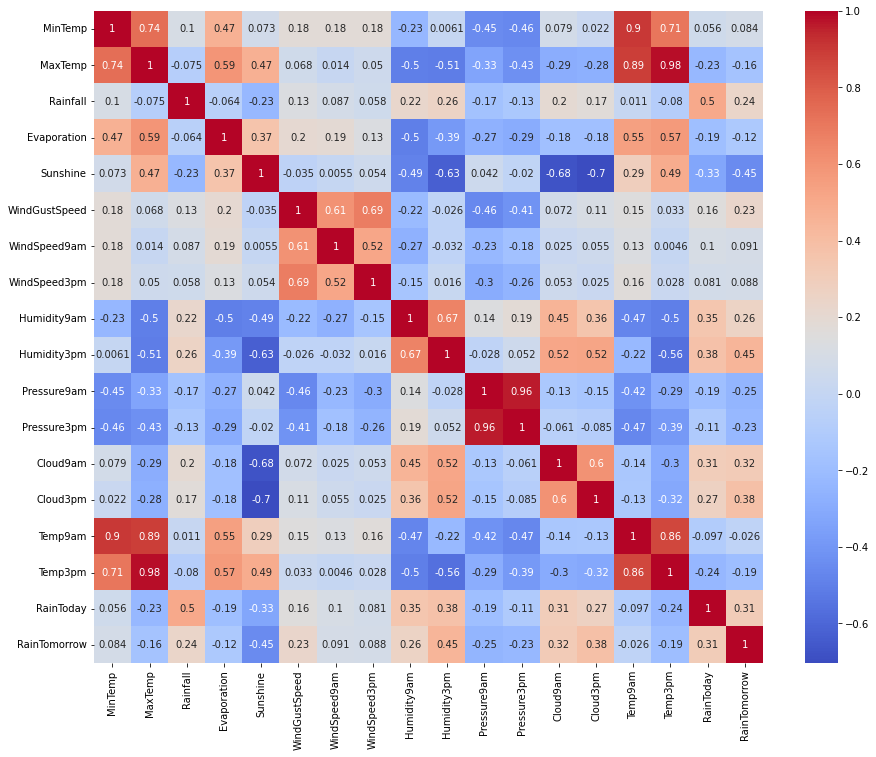

In [7]:
fig = plt.gcf()
fig.set_size_inches((15, 12));

dataset['RainToday'].replace({'No': 0, 'Yes': 1}, inplace  = True)
dataset['RainTomorrow'].replace({'No': 0, 'Yes': 1}, inplace = True)

sns.heatmap(dataset.corr(), annot = True, cmap = sns.color_palette("coolwarm", as_cmap = True));

## **cleaning and preprocessing**

## Feature Selection

**bold text**

In [8]:
X = dataset.iloc[:,[1,2,3,4,7,8,9,10,11,12,13,14,15,16,19,20,21]].values
Y = dataset.iloc[:,-1].values

In [9]:
print(X)

[['Albury' 13.4 22.9 ... 16.9 21.8 0.0]
 ['Albury' 7.4 25.1 ... 17.2 24.3 0.0]
 ['Albury' 12.9 25.7 ... 21.0 23.2 0.0]
 ...
 ['Uluru' 5.4 26.9 ... 12.5 26.1 0.0]
 ['Uluru' 7.8 27.0 ... 15.1 26.0 0.0]
 ['Uluru' 14.9 nan ... 15.0 20.9 0.0]]


In [10]:
print(Y)

[ 0.  0.  0. ...  0.  0. nan]


In [11]:
Y = Y.reshape(-1,1)


#Dealing with invalid Data

In [12]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
X = imputer.fit_transform(X)
Y = imputer.fit_transform(Y)

In [13]:
print(X)

[['Albury' 13.4 22.9 ... 16.9 21.8 0.0]
 ['Albury' 7.4 25.1 ... 17.2 24.3 0.0]
 ['Albury' 12.9 25.7 ... 21.0 23.2 0.0]
 ...
 ['Uluru' 5.4 26.9 ... 12.5 26.1 0.0]
 ['Uluru' 7.8 27.0 ... 15.1 26.0 0.0]
 ['Uluru' 14.9 20.0 ... 15.0 20.9 0.0]]


In [14]:
print(Y)

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


#Encoding Dataset

In [15]:
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
X[:,0] = le1.fit_transform(X[:,0])
le2 = LabelEncoder()
X[:,4] = le2.fit_transform(X[:,4])
le3 = LabelEncoder()
X[:,6] = le3.fit_transform(X[:,6])
le4 = LabelEncoder()
X[:,7] = le4.fit_transform(X[:,7])
le5 = LabelEncoder()
X[:,-1] = le5.fit_transform(X[:,-1])
le6 = LabelEncoder()
Y[:,-1] = le6.fit_transform(Y[:,-1])

In [16]:
print(X)

[[2 13.4 22.9 ... 16.9 21.8 0]
 [2 7.4 25.1 ... 17.2 24.3 0]
 [2 12.9 25.7 ... 21.0 23.2 0]
 ...
 [41 5.4 26.9 ... 12.5 26.1 0]
 [41 7.8 27.0 ... 15.1 26.0 0]
 [41 14.9 20.0 ... 15.0 20.9 0]]


In [17]:
print(Y)

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


In [18]:
Y = np.array(Y,dtype=float)
print(Y)

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


#Feature Scaling

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [20]:
print(X)

[[-1.53166617  0.19132753 -0.04135977 ... -0.01407077  0.02310362
  -0.52979545]
 [-1.53166617 -0.75105231  0.26874452 ...  0.03244663  0.387799
  -0.52979545]
 [-1.53166617  0.11279588  0.35331842 ...  0.62166712  0.22733303
  -0.52979545]
 ...
 [ 1.20928479 -1.06517892  0.52246622 ... -0.69632607  0.65037966
  -0.52979545]
 [ 1.20928479 -0.68822699  0.53656187 ... -0.29317521  0.63579185
  -0.52979545]
 [ 1.20928479  0.42692249 -0.45013361 ... -0.30868102 -0.10818671
  -0.52979545]]


In [21]:
Y

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

## MODELLING

#Splitting Dataset into Training set and Test set

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=None)

In [23]:
print(X_train)

[[-1.67222775 -0.89240928 -1.2676813  ... -0.78936088 -1.28979971
   1.88752093]
 [-1.60194696 -0.46833836 -0.73204661 ... -0.58778546 -0.23947704
  -0.52979545]
 [-1.25054299  1.16512003  2.18575288 ...  1.62954426  2.43009307
  -0.52979545]
 ...
 [ 0.99844241  0.26985919 -0.9293857  ... -0.27766941 -0.92510434
   1.88752093]
 [-1.1802622   1.353596    0.69161401 ...  1.39695722  0.76708218
   1.88752093]
 [ 1.34984638 -0.45263203 -1.1267248  ... -0.86688989 -0.96886778
  -0.52979545]]


In [24]:
print(Y_train)

[[0.]
 [1.]
 [0.]
 ...
 [0.]
 [1.]
 [1.]]


In [25]:
Y_test.shape


(29092, 1)

## MODELS

#Training Model

# **Random Forest**

In [26]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators=100,random_state=0)
classifier_rf.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(random_state=0)

In [27]:
classifier_rf.score(X_train,Y_train)

0.9999226591502819

In [28]:
y_pred_rf = le6.inverse_transform(np.array(classifier_rf.predict(X_test),dtype=int))
Y_test_rf = le6.inverse_transform(np.array(Y_test,dtype=int))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:154: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [29]:
print(y_pred_rf)

[0. 0. 0. ... 0. 0. 0.]


In [30]:
print(Y_test_rf)

[0. 1. 0. ... 0. 0. 1.]


In [31]:
y_pred_rf = y_pred_rf.reshape(-1,1)
Y_test_rf = Y_test_rf.reshape(-1,1)

In [32]:
df = np.concatenate((Y_test_rf,y_pred_rf),axis=1)
dataframe = pd.DataFrame(df,columns=['Rain on Tommorrow','Predition of Rain'])

In [33]:
print(dataframe)

       Rain on Tommorrow  Predition of Rain
0                    0.0                0.0
1                    1.0                0.0
2                    0.0                0.0
3                    1.0                0.0
4                    1.0                1.0
...                  ...                ...
29087                0.0                0.0
29088                0.0                0.0
29089                0.0                0.0
29090                0.0                0.0
29091                1.0                0.0

[29092 rows x 2 columns]


Calculating Accuracy of random forest

In [34]:
from sklearn.metrics import accuracy_score
acc_rfs=accuracy_score(Y_test_rf,y_pred_rf)
acc_rfs

0.8514024474082222

In [35]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
cm=confusion_matrix(Y_test_rf,y_pred_rf)
print(cm)


[[21589  1037]
 [ 3286  3180]]


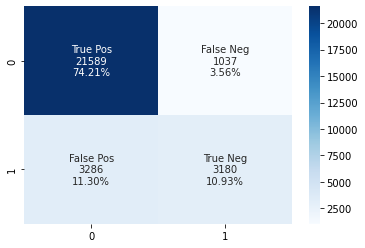

In [36]:
group_names = ['True Pos','False Neg','False Pos','True Neg']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt="", cmap='Blues');

In [37]:
from sklearn.metrics import classification_report
print(classification_report(Y_test_rf,y_pred_rf))

              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91     22626
         1.0       0.75      0.49      0.60      6466

    accuracy                           0.85     29092
   macro avg       0.81      0.72      0.75     29092
weighted avg       0.84      0.85      0.84     29092



# **Logisitic Regression**

In [38]:
from sklearn.linear_model import LogisticRegression  
classifier_lr = LogisticRegression(random_state=0)  
classifier_lr.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0)

In [39]:
classifier_lr.score(X_train,Y_train)

0.8407122232916265

In [40]:
y_pred_lr = le6.inverse_transform(np.array(classifier_lr.predict(X_test),dtype=int))
Y_test_lr = le6.inverse_transform(np.array(Y_test,dtype=int))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:154: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [41]:
print(y_pred_lr)

[0. 0. 0. ... 0. 0. 0.]


In [42]:
print(Y_test_lr)

[0. 1. 0. ... 0. 0. 1.]


In [43]:
y_pred_lr = y_pred_lr.reshape(-1,1)
Y_test_lr = Y_test_lr.reshape(-1,1)

In [44]:
df = np.concatenate((Y_test_lr,y_pred_lr),axis=1)
dataframe = pd.DataFrame(df,columns=['Rain on Tommorrow','Predition of Rain'])

In [45]:
print(dataframe)

       Rain on Tommorrow  Predition of Rain
0                    0.0                0.0
1                    1.0                0.0
2                    0.0                0.0
3                    1.0                0.0
4                    1.0                1.0
...                  ...                ...
29087                0.0                0.0
29088                0.0                0.0
29089                0.0                0.0
29090                0.0                0.0
29091                1.0                0.0

[29092 rows x 2 columns]


In [46]:
from sklearn.metrics import accuracy_score
acc_lr=accuracy_score(Y_test_lr,y_pred_lr)
acc_lr

0.8410559604014849

In [47]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
cm_lr=confusion_matrix(Y_test_lr,y_pred_lr)
print(cm_lr)


[[21487  1139]
 [ 3485  2981]]


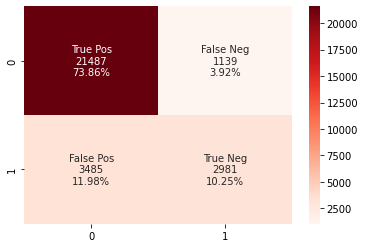

In [48]:
group_names = ['True Pos','False Neg','False Pos','True Neg']
group_counts = ["{0:0.0f}".format(value) for value in
                cm_lr.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm_lr.flatten()/np.sum(cm_lr)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt="", cmap='Reds');

In [49]:
from sklearn.metrics import classification_report
print(classification_report(Y_test_lr,y_pred_lr))

              precision    recall  f1-score   support

         0.0       0.86      0.95      0.90     22626
         1.0       0.72      0.46      0.56      6466

    accuracy                           0.84     29092
   macro avg       0.79      0.71      0.73     29092
weighted avg       0.83      0.84      0.83     29092



# **DecisionTree Classifier**

In [50]:
from sklearn.tree import DecisionTreeClassifier  
classifier_dt = DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier_dt.fit(X_train, Y_train)  

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [51]:
classifier_dt.score(X_train,Y_train)

0.9999226591502819

In [52]:
y_pred_dt = le6.inverse_transform(np.array(classifier_dt.predict(X_test),dtype=int))
Y_test_dt = le6.inverse_transform(np.array(Y_test,dtype=int))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:154: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [53]:
print(y_pred_dt)

[0. 0. 0. ... 1. 0. 0.]


In [54]:
print(Y_test_dt)

[0. 1. 0. ... 0. 0. 1.]


In [55]:
y_pred_dt = y_pred_dt.reshape(-1,1)
Y_test_dt = Y_test_dt.reshape(-1,1)

In [56]:
df = np.concatenate((Y_test_dt,y_pred_dt),axis=1)
dataframe = pd.DataFrame(df,columns=['Rain on Tommorrow','Predition of Rain'])

In [57]:
print(dataframe)

       Rain on Tommorrow  Predition of Rain
0                    0.0                0.0
1                    1.0                0.0
2                    0.0                0.0
3                    1.0                0.0
4                    1.0                0.0
...                  ...                ...
29087                0.0                0.0
29088                0.0                0.0
29089                0.0                1.0
29090                0.0                0.0
29091                1.0                0.0

[29092 rows x 2 columns]


In [58]:
from sklearn.metrics import accuracy_score
acc_dt=accuracy_score(Y_test_dt,y_pred_dt)
acc_dt

0.7829987625464045

In [59]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
cm_dt=confusion_matrix(Y_test_dt,y_pred_dt)
print(cm_dt)

[[19410  3216]
 [ 3097  3369]]


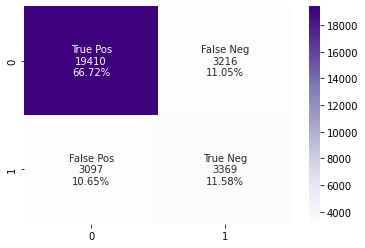

In [60]:
group_names = ['True Pos','False Neg','False Pos','True Neg']
group_counts = ["{0:0.0f}".format(value) for value in
                cm_dt.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm_dt.flatten()/np.sum(cm_dt)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_dt, annot=labels, fmt="", cmap='Purples');

In [61]:
from sklearn.metrics import classification_report
print(classification_report(Y_test_dt,y_pred_dt))

              precision    recall  f1-score   support

         0.0       0.86      0.86      0.86     22626
         1.0       0.51      0.52      0.52      6466

    accuracy                           0.78     29092
   macro avg       0.69      0.69      0.69     29092
weighted avg       0.78      0.78      0.78     29092



# **Light Gbm**

In [62]:
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [63]:
from lightgbm import LGBMClassifier
classifier_lgbm = LGBMClassifier(random_state =0)
classifier_lgbm.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LGBMClassifier(random_state=0)

In [64]:
classifier_lgbm.score(X_train,Y_train)

0.8637683899353774

In [65]:
y_pred_lgbm = le6.inverse_transform(np.array(classifier_lgbm.predict(X_test),dtype=int))
Y_test_lgbm = le6.inverse_transform(np.array(Y_test,dtype=int))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:154: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [66]:
print(y_pred_lgbm)

[0. 0. 0. ... 0. 0. 0.]


In [67]:
print(Y_test_lgbm)

[0. 1. 0. ... 0. 0. 1.]


In [68]:
y_pred_lgbm = y_pred_lgbm.reshape(-1,1)
Y_test_lgbm = Y_test_lgbm.reshape(-1,1)

In [69]:
df = np.concatenate((Y_test_lgbm,y_pred_lgbm),axis=1)
dataframe = pd.DataFrame(df,columns=['Rain on Tommorrow','Predition of Rain'])

In [70]:
print(dataframe)

       Rain on Tommorrow  Predition of Rain
0                    0.0                0.0
1                    1.0                0.0
2                    0.0                0.0
3                    1.0                0.0
4                    1.0                1.0
...                  ...                ...
29087                0.0                0.0
29088                0.0                0.0
29089                0.0                0.0
29090                0.0                0.0
29091                1.0                0.0

[29092 rows x 2 columns]


In [71]:
from sklearn.metrics import accuracy_score
acc_lg=accuracy_score(Y_test_lgbm,y_pred_lgbm)
acc_lg

0.8548741922177918

In [72]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
cm_lg=confusion_matrix(Y_test_lgbm,y_pred_lgbm)
print(cm_lg)

[[21522  1104]
 [ 3118  3348]]


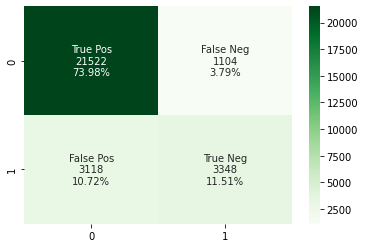

In [73]:
group_names = ['True Pos','False Neg','False Pos','True Neg']
group_counts = ["{0:0.0f}".format(value) for value in
                cm_lg.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm_lg.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_lg, annot=labels, fmt="", cmap='Greens');

In [74]:
from sklearn.metrics import classification_report
print(classification_report(Y_test_lgbm,y_pred_lgbm))

              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91     22626
         1.0       0.75      0.52      0.61      6466

    accuracy                           0.85     29092
   macro avg       0.81      0.73      0.76     29092
weighted avg       0.85      0.85      0.84     29092



# **Naive Bayes**

In [75]:
from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()
classifier_nb.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [76]:
classifier_nb.score(X_train,Y_train)

0.8087102983638114

In [77]:
y_pred_nb = le6.inverse_transform(np.array(classifier_nb.predict(X_test),dtype=int))
Y_test_nb = le6.inverse_transform(np.array(Y_test,dtype=int))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:154: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [78]:
print(y_pred_nb)

[0. 0. 0. ... 0. 1. 0.]


In [79]:
print(Y_test_nb)

[0. 1. 0. ... 0. 0. 1.]


In [80]:
y_pred_nb = y_pred_nb.reshape(-1,1)
Y_test_nb = Y_test_nb.reshape(-1,1)

In [81]:
df = np.concatenate((Y_test_nb,y_pred_nb),axis=1)
dataframe = pd.DataFrame(df,columns=['Rain on Tommorrow','Predition of Rain'])

In [82]:
print(dataframe)

       Rain on Tommorrow  Predition of Rain
0                    0.0                0.0
1                    1.0                0.0
2                    0.0                0.0
3                    1.0                1.0
4                    1.0                1.0
...                  ...                ...
29087                0.0                0.0
29088                0.0                0.0
29089                0.0                0.0
29090                0.0                1.0
29091                1.0                0.0

[29092 rows x 2 columns]


In [83]:
from sklearn.metrics import accuracy_score
acc_nb=accuracy_score(Y_test_nb,y_pred_nb)
acc_nb

0.8067166231266327

In [84]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
cm_nb=confusion_matrix(Y_test_nb,y_pred_nb)
print(cm_nb)

[[20185  2441]
 [ 3182  3284]]


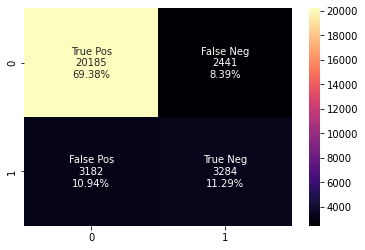

In [85]:
group_names = ['True Pos','False Neg','False Pos','True Neg']
group_counts = ["{0:0.0f}".format(value) for value in
                cm_nb.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm_nb.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_nb, annot=labels, fmt="", cmap='magma');

In [86]:
from sklearn.metrics import classification_report
print(classification_report(Y_test_nb,y_pred_nb))

              precision    recall  f1-score   support

         0.0       0.86      0.89      0.88     22626
         1.0       0.57      0.51      0.54      6466

    accuracy                           0.81     29092
   macro avg       0.72      0.70      0.71     29092
weighted avg       0.80      0.81      0.80     29092



## Accuracy Comparison

In [87]:
accuracy_dict = {"Logistic Regression": acc_lr,
                 "Random Forest": acc_rfs,
                 "Decision Trees": acc_dt,
                 "LightGBM": acc_lg,
                 "Naive Bayes": acc_nb}

accuracy_df = pd.DataFrame( pd.Series(accuracy_dict, index = accuracy_dict.keys()), columns = ["Accuracy"])
accuracy_df

,Accuracy
Logistic Regression,0.841056
Random Forest,0.851402
Decision Trees,0.782999
LightGBM,0.854874
Naive Bayes,0.806717


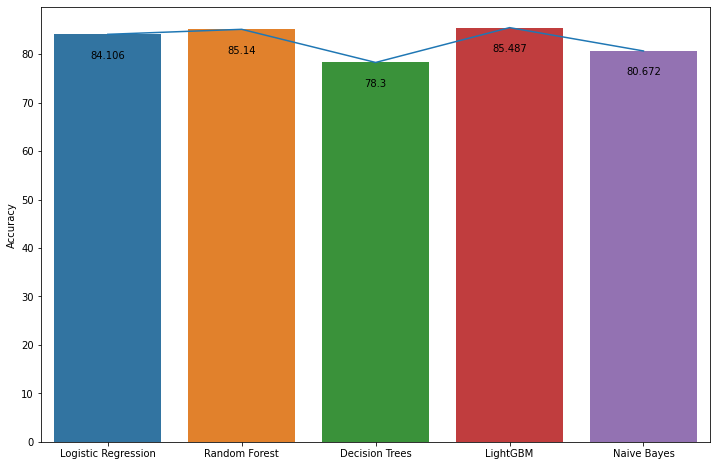

In [88]:
fig = plt.gcf();
fig.set_size_inches(12, 8);

sns.lineplot(x = accuracy_df.index, y = accuracy_df.Accuracy*100);
sns.barplot(x = accuracy_df.index, y = accuracy_df.Accuracy*100);

for i, val in enumerate(accuracy_df.index):
    y = round(accuracy_df.loc[val].sum()*100, 3)
    plt.text(i, y-5, str(y), ha = "center")

In [89]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [90]:
from xgboost import XGBRegressor
clf_xgb = XGBRegressor(random_state=0)
clf_xgb.fit(X_train,Y_train)

[00:54:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [91]:
clf_xgb.score(X_train,Y_train)

0.35579271236943233

In [92]:
y_pred_xgb = le6.inverse_transform(np.array(clf_xgb.predict(X_test),dtype=int))
Y_test_xgb = le6.inverse_transform(np.array(Y_test,dtype=int))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:154: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [93]:
print(y_pred_xgb)

[0. 0. 0. ... 0. 0. 0.]


In [94]:
print(Y_test_xgb)

[0. 1. 0. ... 0. 0. 1.]


In [95]:
y_pred_xgb = y_pred_xgb.reshape(-1,1)
Y_test_xgb = Y_test_xgb.reshape(-1,1)

In [96]:
df = np.concatenate((Y_test_xgb,y_pred_xgb),axis=1)
dataframe = pd.DataFrame(df,columns=['Rain on Tommorrow','Predition of Rain'])

In [97]:
print(dataframe)

       Rain on Tommorrow  Predition of Rain
0                    0.0                0.0
1                    1.0                0.0
2                    0.0                0.0
3                    1.0                0.0
4                    1.0                0.0
...                  ...                ...
29087                0.0                0.0
29088                0.0                0.0
29089                0.0                0.0
29090                0.0                0.0
29091                1.0                0.0

[29092 rows x 2 columns]


In [98]:
from sklearn.metrics import accuracy_score
acc_xgb=accuracy_score(Y_test_xgb,y_pred_xgb)
acc_xgb

0.7832737522342912

In [99]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
cm_xgb=confusion_matrix(Y_test_xgb,y_pred_xgb)
print(cm_xgb)

[[22620     6]
 [ 6299   167]]


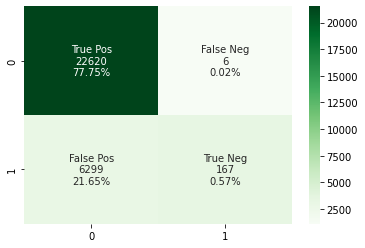

In [100]:
group_names = ['True Pos','False Neg','False Pos','True Neg']
group_counts = ["{0:0.0f}".format(value) for value in
                cm_xgb.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm_xgb.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_lg, annot=labels, fmt="", cmap='Greens');

In [101]:
from sklearn.metrics import classification_report
print(classification_report(Y_test_xgb,y_pred_xgb))

              precision    recall  f1-score   support

         0.0       0.78      1.00      0.88     22626
         1.0       0.97      0.03      0.05      6466

    accuracy                           0.78     29092
   macro avg       0.87      0.51      0.46     29092
weighted avg       0.82      0.78      0.69     29092



In [102]:
import pickle

In [103]:
filename = 'trained_model.sav'
pickle.dump(classifier_rf,open(filename,'wb'))

In [104]:
loaded_model=pickle.load(open('trained_model.sav','rb'))

In [105]:
import numpy as np
from sklearn.preprocessing import StandardScaler
test=np.array([[15,15,15,15,15,15,15,15,15,14,13,1121,11,10,15,15,15],[5,5,5,5,5,5,5,5,5,4,3,2,1,0,5,5,5],[5,5,5,5,5,5,5,5,5,4,3,2,1,0,5,5,5]
               ,[5,5,5,5,5,5,5,5,5,4,3,2,1,0,5,5,5],[5,5,5,5,5,5,5,5,5,4,3,2,1,0,5,5,5],[5,5,5,5,5,5,5,5,5,4,3,2,1,0,5,5,5],
               [5,5,5,5,5,5,5,5,5,4,3,2,1,0,5,5,5],[5,5,5,5,5,5,5,5,5,4,3,2,1,0,5,5,5],[5,5,5,5,5,5,5,5,5,4,3,2,1,0,5,5,5],
               [5,5,5,5,5,5,5,5,5,4,3,2,1,0,5,5,5]])
sc1 = StandardScaler()
test = sc1.fit_transform(test)

y_ans=np.array([[1,1,0,0,0,0,0,0,0,0]]) #what is the actual
user_input = le6.inverse_transform(np.array(loaded_model.predict(test),dtype=int)) #what we predicted
user_input=user_input.reshape(-1,1)
y_ans=y_ans.reshape(-1,1)

In [106]:
from sklearn.metrics import accuracy_score
acc_ans=accuracy_score(y_ans,user_input)
print(acc_ans)

0.9


In [109]:
arr=np.array([['Yes'],['No']])
att=pd.DataFrame(arr)

In [110]:
att

,0
0,Yes
1,No


In [111]:
print(dataset['Location'].unique())

['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']


In [112]:
print(dataset['WindGustDir'].unique())

['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' nan 'ENE' 'SSE' 'S' 'NW' 'SE'
 'ESE' 'E' 'SSW']
